#  Logistic Regression in PyTorch

MNIST Handwritten Digits Database 

In [55]:
# Imports
import torch
print(torch.__version__)

import torchvision

from torchvision.datasets import MNIST

1.6.0


In [56]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

test_dataset = MNIST(root='data/', train=False)
len(dataset), len(test_dataset)

(60000, 10000)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


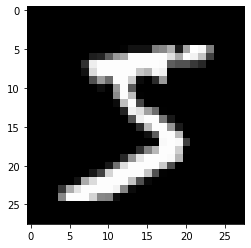

In [58]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [59]:
import torchvision.transforms as transforms
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [60]:
print(img_tensor[:,15:20,15:20])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.7294, 0.9922, 0.9922, 0.5882, 0.1059],
         [0.0627, 0.3647, 0.9882, 0.9922, 0.7333],
         [0.0000, 0.0000, 0.9765, 0.9922, 0.9765],
         [0.5098, 0.7176, 0.9922, 0.9922, 0.8118],
         [0.9922, 0.9922, 0.9922, 0.9804, 0.7137]]])
tensor(1.) tensor(0.)


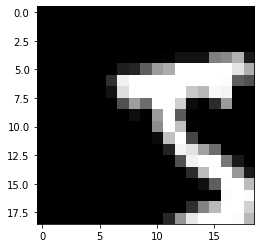

In [61]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,1:20,1:20], cmap='gray');

# Split datasets: Training,Validation,Test

In [62]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [63]:
from torch.utils.data import DataLoader

batch_size = 256
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Logistic Model

In [64]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [65]:
print(model.weight.shape)
print(model.weight)
print(model.bias.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0049, -0.0220,  0.0093,  ...,  0.0144, -0.0282,  0.0297],
        [ 0.0089, -0.0141,  0.0253,  ...,  0.0041,  0.0231,  0.0117],
        [ 0.0051,  0.0354,  0.0051,  ...,  0.0071, -0.0334, -0.0351],
        ...,
        [ 0.0331, -0.0333, -0.0257,  ...,  0.0142,  0.0127, -0.0116],
        [-0.0244, -0.0357,  0.0003,  ..., -0.0133, -0.0097, -0.0326],
        [-0.0192,  0.0205, -0.0026,  ..., -0.0008, -0.0185, -0.0236]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([ 0.0261, -0.0114,  0.0191,  0.0115, -0.0254,  0.0238, -0.0105,  0.0185,
        -0.0232, -0.0248], requires_grad=True)


In [66]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [67]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0232,  0.0313, -0.0236,  ...,  0.0112, -0.0226, -0.0280],
         [-0.0107,  0.0162, -0.0293,  ...,  0.0262, -0.0348,  0.0185],
         [ 0.0261, -0.0138,  0.0078,  ..., -0.0212,  0.0333,  0.0202],
         ...,
         [-0.0059,  0.0007, -0.0140,  ..., -0.0140,  0.0192,  0.0224],
         [ 0.0041,  0.0153, -0.0024,  ...,  0.0057,  0.0245, -0.0146],
         [ 0.0122,  0.0061,  0.0252,  ..., -0.0138,  0.0103, -0.0101]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0340, -0.0263,  0.0271, -0.0345,  0.0077,  0.0225,  0.0176,  0.0050,
          0.0185,  0.0124], requires_grad=True)]

In [68]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([256, 10])
Sample outputs :
 tensor([[ 0.0487, -0.1419,  0.2454, -0.2162,  0.2656,  0.0015,  0.2894, -0.0241,
          0.1475,  0.1271],
        [-0.1447,  0.1633, -0.0918, -0.2126, -0.1109, -0.0081,  0.0878,  0.0212,
         -0.1531,  0.2411]])


# softmax: convert the output into probabilities

In [69]:
import torch.nn.functional as F
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:1].data)

Sample probabilities:
 tensor([[0.0962, 0.0795, 0.1171, 0.0738, 0.1195, 0.0918, 0.1224, 0.0894, 0.1062,
         0.1040]])


### torch.max returns the largest element, index of the largest element along a particular dimension of a tensor.

In [70]:
# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)
print(labels)

Sum:  1.0
tensor([6, 9, 2, 7, 2, 2, 9, 2, 9, 0, 5, 2, 0, 2, 2, 2, 6, 5, 5, 2, 2, 2, 2, 2,
        2, 2, 2, 6, 0, 2, 6, 6, 5, 5, 9, 8, 6, 8, 2, 5, 2, 7, 2, 7, 2, 5, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 7, 0, 1, 2, 2, 2, 9, 9, 7, 5, 2, 2, 2, 2, 2, 9, 7,
        6, 5, 2, 2, 0, 0, 2, 6, 9, 6, 5, 4, 5, 2, 6, 0, 2, 8, 8, 5, 0, 9, 5, 6,
        2, 2, 2, 2, 6, 6, 7, 2, 2, 9, 9, 1, 2, 5, 1, 2, 5, 6, 2, 2, 2, 2, 2, 2,
        5, 5, 6, 6, 9, 6, 1, 2, 0, 2, 2, 5, 7, 2, 6, 2, 2, 6, 7, 5, 2, 2, 7, 9,
        2, 9, 2, 5, 7, 5, 9, 6, 6, 0, 6, 2, 2, 2, 2, 9, 2, 6, 2, 2, 2, 9, 6, 6,
        8, 2, 1, 5, 0, 2, 2, 8, 2, 2, 4, 5, 9, 9, 2, 2, 9, 2, 2, 9, 2, 2, 2, 2,
        2, 2, 5, 2, 2, 7, 2, 5, 5, 2, 2, 6, 9, 2, 6, 2, 2, 9, 5, 2, 2, 5, 6, 2,
        5, 5, 0, 6, 7, 2, 5, 6, 2, 9, 2, 5, 9, 6, 2, 5, 2, 9, 2, 6, 9, 2, 5, 5,
        2, 2, 2, 2, 9, 2, 2, 6, 1, 5, 2, 9, 2, 2, 6, 6])
tensor([0.1224, 0.1286, 0.1307, 0.1295, 0.1451, 0.1354, 0.1464, 0.1461, 0.1592,
        0.1389, 0.1438, 0.1284, 0.1218, 0.1301, 0.143

# Evaluate the Accuracy

In [71]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
accuracy(outputs, labels)

tensor(0.1484)

In [72]:
loss_fn = F.cross_entropy
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2853, grad_fn=<NllLossBackward>)


# Training the model

In [73]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [74]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [75]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.2633652687072754, 'val_acc': 0.17919921875}

In [76]:
history = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 2.0662, val_acc: 0.5135
Epoch [1], val_loss: 1.9034, val_acc: 0.6619
Epoch [2], val_loss: 1.7645, val_acc: 0.7182
Epoch [3], val_loss: 1.6449, val_acc: 0.7411
Epoch [4], val_loss: 1.5415, val_acc: 0.7585
Epoch [5], val_loss: 1.4519, val_acc: 0.7708
Epoch [6], val_loss: 1.3741, val_acc: 0.7803
Epoch [7], val_loss: 1.3062, val_acc: 0.7877
Epoch [8], val_loss: 1.2465, val_acc: 0.7945
Epoch [9], val_loss: 1.1938, val_acc: 0.7992
Epoch [10], val_loss: 1.1471, val_acc: 0.8032
Epoch [11], val_loss: 1.1054, val_acc: 0.8075
Epoch [12], val_loss: 1.0680, val_acc: 0.8099
Epoch [13], val_loss: 1.0343, val_acc: 0.8135
Epoch [14], val_loss: 1.0038, val_acc: 0.8157
Epoch [15], val_loss: 0.9761, val_acc: 0.8184
Epoch [16], val_loss: 0.9508, val_acc: 0.8202
Epoch [17], val_loss: 0.9276, val_acc: 0.8232
Epoch [18], val_loss: 0.9062, val_acc: 0.8250
Epoch [19], val_loss: 0.8865, val_acc: 0.8275


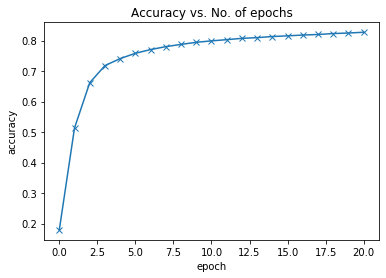

In [77]:
# Replace these values with your results
history = [result0] + history
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Testing 

In [78]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


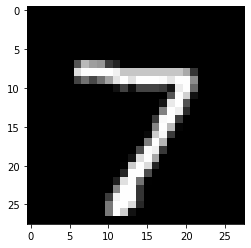

In [79]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [80]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [81]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


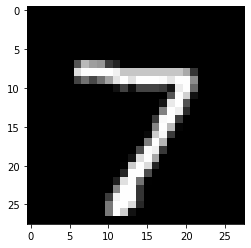

In [82]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


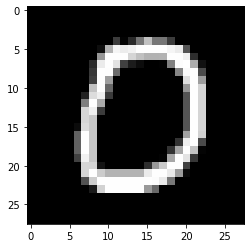

In [83]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [84]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.8541518449783325, 'val_acc': 0.840624988079071}

# Save model for reusing

In [85]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [86]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0174,  0.0258,  0.0119,  ..., -0.0281,  0.0168, -0.0009],
                      [-0.0333, -0.0037,  0.0047,  ..., -0.0177, -0.0336,  0.0098],
                      [ 0.0313,  0.0085, -0.0137,  ..., -0.0151, -0.0331,  0.0164],
                      ...,
                      [ 0.0047, -0.0313,  0.0109,  ..., -0.0121, -0.0225,  0.0229],
                      [ 0.0154, -0.0161,  0.0333,  ...,  0.0349,  0.0356,  0.0021],
                      [ 0.0066, -0.0071,  0.0091,  ..., -0.0230, -0.0109,  0.0097]])),
             ('linear.bias',
              tensor([-0.0325,  0.0540, -0.0313, -0.0186,  0.0447,  0.0246, -0.0134, -0.0028,
                      -0.0262, -0.0006]))])

In [87]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0174,  0.0258,  0.0119,  ..., -0.0281,  0.0168, -0.0009],
                      [-0.0333, -0.0037,  0.0047,  ..., -0.0177, -0.0336,  0.0098],
                      [ 0.0313,  0.0085, -0.0137,  ..., -0.0151, -0.0331,  0.0164],
                      ...,
                      [ 0.0047, -0.0313,  0.0109,  ..., -0.0121, -0.0225,  0.0229],
                      [ 0.0154, -0.0161,  0.0333,  ...,  0.0349,  0.0356,  0.0021],
                      [ 0.0066, -0.0071,  0.0091,  ..., -0.0230, -0.0109,  0.0097]])),
             ('linear.bias',
              tensor([-0.0325,  0.0540, -0.0313, -0.0186,  0.0447,  0.0246, -0.0134, -0.0028,
                      -0.0262, -0.0006]))])

In [88]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.8541518449783325, 'val_acc': 0.840624988079071}